In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import Ridge

In [5]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = np.array(feature)
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = list(map(lambda x:x**power, np.array(feature)))
    return poly_dataframe

## Load in the data and also sort the sales data frame by ‘sqft_living’.

In [6]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
#For houses with identical square footage, we break the tie by their prices.
sales = sales.sort_values(by = ['sqft_living','price'])

sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


## 3. Let us revisit the 15th-order polynomial model using the 'sqft_living' input. 

In [7]:
l2_small_penalty = 1.5e-5


In [8]:
poly_15_data = polynomial_dataframe(sales['sqft_living'], 15)

model = Ridge(alpha=l2_small_penalty, normalize=True)

In [9]:
poly_15_data

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
1,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
2,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
3,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
5,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38
6,410.0,168100.0,6.892100e+07,2.825761e+10,1.158562e+13,4.750104e+15,1.947543e+18,7.984925e+20,3.273819e+23,1.342266e+26,5.503290e+28,2.256349e+31,9.251031e+33,3.792923e+36,1.555098e+39
7,420.0,176400.0,7.408800e+07,3.111696e+10,1.306912e+13,5.489032e+15,2.305393e+18,9.682652e+20,4.066714e+23,1.708020e+26,7.173683e+28,3.012947e+31,1.265438e+34,5.314838e+36,2.232232e+39
8,420.0,176400.0,7.408800e+07,3.111696e+10,1.306912e+13,5.489032e+15,2.305393e+18,9.682652e+20,4.066714e+23,1.708020e+26,7.173683e+28,3.012947e+31,1.265438e+34,5.314838e+36,2.232232e+39
9,430.0,184900.0,7.950700e+07,3.418801e+10,1.470084e+13,6.321363e+15,2.718186e+18,1.168820e+21,5.025926e+23,2.161148e+26,9.292937e+28,3.995963e+31,1.718264e+34,7.388536e+36,3.177070e+39


In [10]:
#Fit the model
model.fit(poly_15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

## Quiz Question: What’s the learned value for the coefficient of feature power_1?

In [11]:
model.coef_[0]

124.87330648343453

## Compare the results obtained on 4 sets with the Linear Model

In [12]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [13]:
def check_sets(data):
    print(data.shape)
    print('Price is present in columns ' + str('price' in data.columns))
    

In [14]:
set_list = [set_1, set_2, set_3, set_4]
list(map(check_sets, set_list))

(5404, 21)
Price is present in columns True
(5398, 21)
Price is present in columns True
(5409, 21)
Price is present in columns True
(5402, 21)
Price is present in columns True


[None, None, None, None]

### Print the Equation in a mathematically form

In [15]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coef_['value'])-1

    # Get learned parameters as a list
    w = list(model.coef_['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print ('Learned polynomial for degree ' + str(deg) + ':')
    w.reverse()
    print (np.poly1d(w))

##  Fit a 15th degree polynomial on each of the 4 sets, plot the results and view the weights for the four models. This time, set l2_small_penalty=1e-9

In [16]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Linear least squares with l2 regularization.
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1`` in other linear models such as
 |      LogisticRegression or LinearSVC. If an

In [17]:
model.coef_

array([ 1.24873306e+02, -4.77376011e-02,  3.01446238e-05, -2.44419942e-09,
       -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,  8.27979094e-26,
        6.52603100e-31, -3.27895017e-34, -3.87962315e-38, -2.72437650e-42,
       -1.07790800e-46,  3.78242694e-51,  1.39790296e-54])

In [18]:
def plotting(X,y_actual, y_predicted):
    plt.plot(X, y_actual, '.' )
    plt.plot(X, y_predicted, '-')
    plt.show()

In [19]:
power_zero_coeff = []
def modelling_sets(data, l2_small_penalty=1e-9):
    
    #Fit the 15th Degree polynomial on each of the data
    poly_15_data = polynomial_dataframe(data['sqft_living'], 15)
    
    #Create a model
    model = Ridge(alpha=l2_small_penalty, normalize=True)
    
    #Fit the model
    model.fit(poly_15_data, data['price'])
    
    #Print the coefficients
    print("Coefficient=\n")
    print(model.coef_)
    power_zero_coeff.append(model.coef_[0])
    
    #Predict the values of the set
    predicted_values = model.predict(poly_15_data)
    
    #Plot the results
    plotting(range(1, len(poly_15_data)+1), data['price'], predicted_values)  
    

Coefficient=

[ 5.44669399e+02 -3.55447604e-01  1.22446381e-04 -1.17175309e-08
 -3.90512597e-13 -1.39076127e-17  1.47860302e-20  6.87491654e-25
 -7.57204140e-29 -1.04097261e-32 -3.71844401e-37  3.39989338e-41
  5.56592041e-45  2.53761378e-49 -3.35152912e-53]


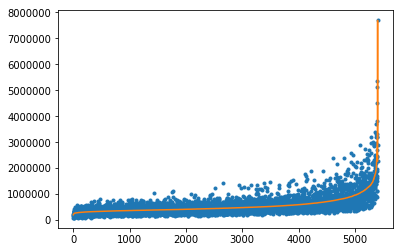

Coefficient=

[ 8.59362643e+02 -8.18118273e-01  4.28879983e-04 -9.12770679e-08
 -2.69604331e-12  3.73980295e-15 -1.42711899e-19 -6.30794687e-23
 -1.44559573e-27  7.44321303e-31  9.25865786e-35  3.28021364e-41
 -1.29543504e-42 -1.38781262e-46  1.66546445e-50]


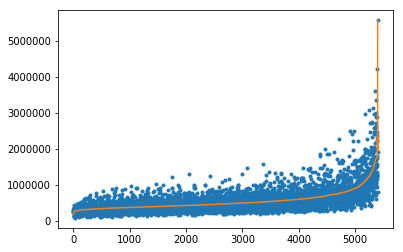

Coefficient=

[-7.55395965e+02  9.75579553e-01 -4.58946022e-04  7.77958196e-08
  7.15013219e-12 -2.88601991e-15 -2.13677418e-20  3.38085167e-23
  2.19178165e-27 -1.97067721e-31 -4.15993184e-35 -1.80196150e-39
  3.19071132e-43  5.08456909e-47 -3.93304251e-51]


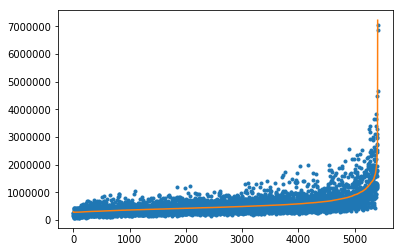

Coefficient=

[ 1.11944570e+03 -9.83760190e-01  3.38770877e-04  3.60377305e-08
 -4.37814038e-11  5.77191687e-15  7.66795326e-19 -9.49297879e-23
 -1.96030800e-26 -2.10880814e-32  3.31005043e-34  3.47733911e-38
 -2.43039270e-42 -8.79553320e-46  6.44569706e-50]


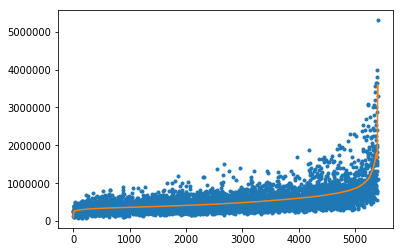

[None, None, None, None]

In [20]:
#Map the function on each set

list(map(modelling_sets, set_list))

### 8. Quiz Question: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?

In [21]:
print("Largest Coefficient:- %.2f\nSmallest Coefficient:- %.2f" %(max(power_zero_coeff), min(power_zero_coeff)))

Largest Coefficient:- 1119.45
Smallest Coefficient:- -755.40


### Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty.

In [22]:
l2_large_penalty=1.23e2

Coefficient=

[2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
 1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
 1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
 4.09542560e-50 2.85464889e-54 1.99547476e-58]


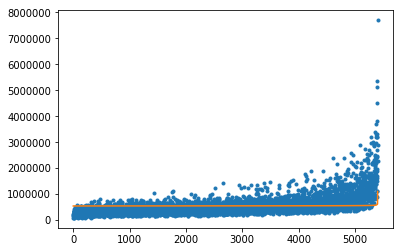

Coefficient=

[2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
 9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
 9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
 1.15453748e-47 1.23211305e-51 1.31986696e-55]


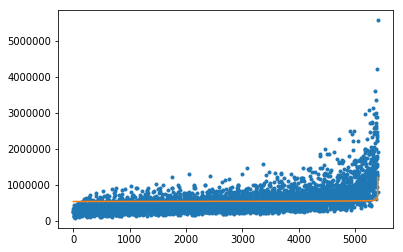

Coefficient=

[2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
 6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
 4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
 4.84635021e-48 4.85883628e-52 4.87558469e-56]


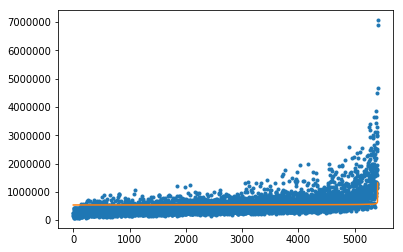

Coefficient=

[2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
 1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
 2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
 5.67212304e-47 6.85958087e-51 8.30843630e-55]


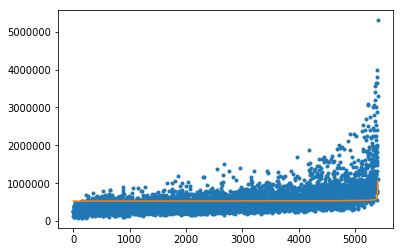

[None, None, None, None]

In [23]:
[modelling_sets(set_ele, l2_large_penalty) for set_ele in set_list]

In [24]:
print("Largest Coefficient:- %.2f\nSmallest Coefficient:- %.2f" %(max(power_zero_coeff[4:8]), min(power_zero_coeff[4:8])))

Largest Coefficient:- 2.33
Smallest Coefficient:- 2.09


## Cross Validation

In [25]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [26]:
sales.iloc[0, 2]

142000.0

In [27]:
sales.loc[19452, 'price']

142000.0

In [28]:
def splitting_data(start, end):
    test_data = data.iloc[start:end, :]
    if(start==0):
        train_data = data.iloc[end:, :]
        return (train_data, test_data)
    
    train_data = pd.concat([data.iloc[:start], data.iloc[end:, :]])
    return (train_data, test_data)

In [29]:
def k_fold(k):
    burst = n//k
    ind = 0
    for i in range(k):
        start_ind = ind
        end_ind = ind+burst+1
        ind = end_ind
        train_data, test_data = splitting_data(start_ind, end_ind)
        